# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.

### 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
### 2.  The company needs to check whether there is any dependency between the features “Region” and “Manager”.

#### Importing Dependancies and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import stats

In [2]:
df = pd.read_csv("Sales_add.csv")

In [3]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
df.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [5]:
df.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


## 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

<AxesSubplot:ylabel='Frequency'>

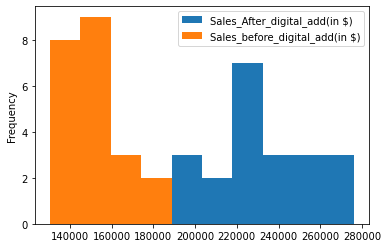

In [7]:
df[["Sales_After_digital_add(in $)","Sales_before_digital_add(in $)"]].plot.hist()


In [8]:
bd_sales = df["Sales_before_digital_add(in $)"]

In [9]:
bd_sales

0     132921
1     149559
2     146278
3     152167
4     159525
5     137163
6     130625
7     131140
8     171259
9     141956
10    159339
11    178939
12    145062
13    151514
14    147463
15    177195
16    140862
17    167996
18    132135
19    152493
20    147425
21    130263
Name: Sales_before_digital_add(in $), dtype: int64

In [10]:
#Mean value of sales before digital marketing
bd_sales.mean()

149239.95454545456

In [11]:
ad_sales = df["Sales_After_digital_add(in $)"]

In [12]:
ad_sales

0     270390
1     223334
2     244243
3     231808
4     258402
5     256948
6     222106
7     230637
8     226261
9     193735
10    203175
11    276279
12    205180
13    253131
14    229336
15    187305
16    234908
17    191517
18    227040
19    212579
20    263388
21    243020
Name: Sales_After_digital_add(in $), dtype: int64

In [13]:
#Mean value of sales after digital marketing
ad_sales.mean()

231123.72727272726

### Hypothesis test on Sales (t-test)

Here we are checking whether there is any increase in sales after moving to the digital marketing

### H0: Increase in sales after moving to digital marketing
### H1: No increase in sales

In [14]:
ttest,pval = ttest_ind(a=bd_sales, b=ad_sales,alternative="greater" )
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i e Mean value of sales after digital marketing is <= Mean value of sales before digital marketing")
else:
  print("We accept null hypothesis i.e. Mean value of sales after digital marketing is  > Mean value of sales before digital marketing")

p-value 0.9999999999999999
We accept null hypothesis i.e. Mean value of sales after digital marketing is  > Mean value of sales before digital marketing


## 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

### Hypothesis test on Region and Manager (chi2-test)

Here we are checking whether there is any dependency between region and manager

### H0: There is a relation between the features
### H1: There is no relation

In [15]:
df["Region"].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [16]:
df["Manager"].value_counts()

Manager - A    9
Manager - B    7
Manager - C    6
Name: Manager, dtype: int64

In [17]:
data = pd.crosstab(df["Region"], df["Manager"])

In [18]:
data

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [19]:
chi2_contingency(data)

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

**Findings**

The p-value is over 0.5 , so we accept the null hypothesis that there is a relationship between the Region and Manager.